In [0]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [3]:
data, labels = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


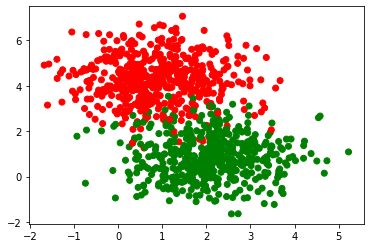

In [4]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(data, labels, stratify=labels, random_state = 2)
print(X_train.shape,X_test.shape)

(750, 2) (250, 2)


In [0]:
model = linear_model.LogisticRegression()

In [7]:
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
Y_pred = model.predict(X_test)
#print(Y_pred)
Y_pred_proba = model.predict_proba(X_test)
print(Y_pred_proba)

[[9.99160607e-01 8.39393080e-04]
 [9.94640595e-01 5.35940482e-03]
 [5.76575577e-02 9.42342442e-01]
 [3.61283255e-01 6.38716745e-01]
 [7.57331472e-04 9.99242669e-01]
 [9.99941071e-01 5.89294495e-05]
 [2.19248661e-01 7.80751339e-01]
 [9.99190753e-01 8.09247314e-04]
 [9.99736599e-01 2.63400975e-04]
 [9.91880575e-01 8.11942487e-03]
 [1.22320734e-04 9.99877679e-01]
 [8.25428803e-04 9.99174571e-01]
 [9.99083659e-01 9.16340569e-04]
 [9.92864621e-01 7.13537947e-03]
 [4.70330473e-02 9.52966953e-01]
 [9.28813938e-01 7.11860624e-02]
 [9.99977174e-01 2.28257498e-05]
 [1.83708756e-05 9.99981629e-01]
 [3.37183485e-04 9.99662817e-01]
 [1.58355285e-01 8.41644715e-01]
 [9.77630855e-01 2.23691446e-02]
 [1.21974485e-04 9.99878026e-01]
 [2.53995512e-01 7.46004488e-01]
 [9.99810757e-01 1.89242987e-04]
 [1.84172002e-03 9.98158280e-01]
 [9.94359273e-01 5.64072749e-03]
 [9.95044745e-01 4.95525479e-03]
 [1.52556346e-01 8.47443654e-01]
 [3.89671119e-03 9.96103289e-01]
 [3.54366359e-05 9.99964563e-01]
 [3.712301

In [0]:
ascore = accuracy_score(Y_test,Y_pred)

In [10]:
print(ascore)

0.964


In [18]:
classification_report(Y_test,Y_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.98      0.96       125\n           1       0.98      0.95      0.96       125\n\n    accuracy                           0.96       250\n   macro avg       0.96      0.96      0.96       250\nweighted avg       0.96      0.96      0.96       250\n'

In [20]:
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[122   3]
 [  6 119]]


In [0]:
coeff = model.coef_
intercept = model.intercept_

In [12]:
print(intercept,coeff)

[6.48886506] [[ 0.77523549 -2.96913894]]


In [13]:
ar = np.array([1,2,0,3,5])
ar.max()

5

In [0]:
x1min, x1max = X_test[:,0].min()-.5, X_test[:,0].max()+.5
x2min, x2max = X_test[:,1].min()-.5, X_test[:,1].max()+.5
xvals = np.arange(x1min,x1max,.2)
yvals = np.arange(x2min,x2max,.2)
xx, yy = np.meshgrid(xvals,yvals)
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

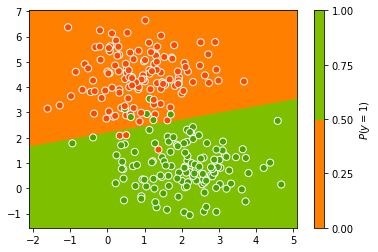

In [15]:
f, ax = plt.subplots()
contour = ax.contourf(xx, yy, probs,1, cmap=my_cmap,
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:,0], X_test[:, 1], c=Y_test, s=50,
           cmap=my_cmap, vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

